In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_regression

In [3]:
data=make_regression(1000,20,n_informative=15,noise=10)
x=pd.DataFrame(data[0])
y=pd.Series(data[1])

In [4]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [5]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 ## Closed form solution of Linear Reg and Ridge Reg

In [6]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(0.10847752307961755,
 array([ 1.79247091, 32.46556895, 87.90701273, 64.08021075, 30.02109112,
        -0.11379584, 16.11445425, 47.25167095, 25.19645659, 60.14749417,
         0.32466091, 96.72209166, 68.49111697, 93.17852129,  0.19886888,
        -0.17177873, 72.40079954, -0.45997287, 28.61850172, 71.97423666]))

In [7]:
x_sc=np.c_[np.ones(x.shape[0]),x]
reg_sc=np.linalg.inv(x_sc.T@x_sc) @ (x_sc.T@y.values.reshape(-1,1))
reg_sc[0],reg_sc[1:].flatten()

(array([0.10847752]),
 array([ 1.79247091, 32.46556895, 87.90701273, 64.08021075, 30.02109112,
        -0.11379584, 16.11445425, 47.25167095, 25.19645659, 60.14749417,
         0.32466091, 96.72209166, 68.49111697, 93.17852129,  0.19886888,
        -0.17177873, 72.40079954, -0.45997287, 28.61850172, 71.97423666]))

In [8]:
rid_reg=Ridge(150,)
rid_reg.fit(x,y)
rid_reg.intercept_,rid_reg.coef_

(0.981658863037576,
 array([ 0.29597433, 28.87884167, 74.73154289, 55.39806386, 25.68068432,
         0.18802345, 13.38589955, 39.84192126, 21.79970515, 51.74716725,
         1.28049927, 81.84241627, 58.47165065, 79.48590502, -0.35719078,
         0.25814899, 61.54170623,  0.15945831, 24.15702637, 62.47562651]))

In [9]:
rid_reg_sc=np.linalg.inv(x_sc.T@x_sc + np.identity(x_sc.shape[1])*150) @ (x_sc.T@y.values.reshape(-1,1))
rid_reg_sc[0],rid_reg_sc[1:].flatten()


(array([0.85236048]),
 array([ 0.29932397, 28.87808442, 74.73404942, 55.39399817, 25.68098471,
         0.18683354, 13.38882336, 39.84606404, 21.79781056, 51.74372194,
         1.28054142, 81.84788223, 58.47189098, 79.48733221, -0.35417237,
         0.25816224, 61.5423861 ,  0.16626187, 24.15722484, 62.47667504]))

## Ridge Using Gradient Descent

In [10]:
def gradientdesc_ridge(*b,yi,xi,lam,tolerane,eta,verbose=False):
    mag=100
    xi=np.c_[[1 for _ in range(len(xi))],xi]
    while mag>tolerane:
        coef=np.array([*b]).reshape(-1,1)
        pred=xi
        error=yi.values.reshape(-1,1)-pred.dot(coef)
        a=[np.sum(error)]
        for i in range(1,xi.shape[1]):
            a.append(np.sum(error*xi[:,i].reshape(-1,1)))
        derv=np.array(a)
        new_co=(coef*(1-(2*eta*lam)))+(2*eta*derv.reshape(-1,1))#the online line that changes from LR GD
        if verbose==True:
            print(*new_co)
        ns=new_co
        b=ns.flatten()
        m=[]
        for z in derv:
            m.append(z**2)
        mag=np.sqrt(np.sum(m))
    return b

In [11]:
x=pd.DataFrame(data[0])
y=pd.Series(data[1])
ew=[0 for _ in range(x.shape[1]+1)]

In [12]:
#gradientdesc_ridge(ew,xi=x,yi=y,lam=150,tolerane=0.01,eta=0.0001,verbose=True)

In [13]:
def coordinate_descent_ridge(X,y,lam,alpha = .03, num_iters=20,normalize=False,verbose=False):
    if normalize==False:
        X=np.c_[np.ones(X.shape[0]),X]
        m,n = X.shape
        theta = np.zeros(n).reshape(-1,1)
        print(theta.flatten())
    
        for i in range(num_iters):
            for j in range(n):
                h = X @ theta 
                gradient =  ((X[:,j] @ (h-y))) + (lam*theta[j])
                theta[j] = theta[j] - alpha * gradient
                if verbose==True:
                    print(theta.flatten())
                       
        return theta.flatten()
    elif normalize==True:
        X=np.c_[np.ones(X.shape[0]),X]
        X = X / (np.linalg.norm(X,axis = 0)) 
        m,n = X.shape
        theta = np.zeros(n).reshape(-1,1)
        print(theta.flatten())
        for i in range(num_iters):
            for j in range(n):
                h = ((X[:,0:j] @ theta[0:j]) + (X[:,j+1:] @ theta[j+1:]))
                theta[j] =  (X[:,j] @ (y - h))/(1+lam)
                if verbose==True:
                    print(theta.flatten())
                       
    return theta.flatten()

In [14]:
coordinate_descent_ridge(x,y.values.reshape(-1,1),150,alpha = .00001, num_iters=1000,normalize=False,verbose=False)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([ 0.85407324,  0.29705547, 28.87885342, 74.73004281, 55.39211114,
       25.67902355,  0.18812186, 13.38698987, 39.84345542, 21.79700811,
       51.74245244,  1.28212387, 81.84351559, 58.47000665, 79.48396972,
       -0.35548652,  0.25930827, 61.54011878,  0.16671579, 24.15582229,
       62.47588334])

In [15]:
rid_reg_sc[0],rid_reg_sc[1:].flatten()

(array([0.85236048]),
 array([ 0.29932397, 28.87808442, 74.73404942, 55.39399817, 25.68098471,
         0.18683354, 13.38882336, 39.84606404, 21.79781056, 51.74372194,
         1.28054142, 81.84788223, 58.47189098, 79.48733221, -0.35417237,
         0.25816224, 61.5423861 ,  0.16626187, 24.15722484, 62.47667504]))

In [16]:
coordinate_descent_ridge(x,y.values.reshape(-1,1),150,alpha = .03, num_iters=20,normalize=True,verbose=False)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([ 1.0776383 , -1.69467684,  7.86007649, 16.12923194, 12.92758418,
        6.02830188,  0.17595253,  2.51713211,  7.78558524,  5.14542883,
       11.90002239,  1.73089563, 16.82728526, 12.30396548, 17.4225    ,
       -0.67973423,  0.43477952, 13.03910123,  0.95301171,  5.01735809,
       15.33727546])

In [17]:
#x_sc_1 = x_sc / (np.linalg.norm(x_sc,axis = 0)) 
#rid_reg_sc=np.linalg.inv(x_sc_1.T@x_sc_1 + np.identity(x_sc_1.shape[1])*150) @ (x_sc_1.T@y.values.reshape(-1,1))
#rid_reg_sc[0],rid_reg_sc[1:].flatten()

## LASSO from scratch using coordinate descent

In [18]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
Ridge()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [20]:
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
# WORK IN PROGRESS

In [21]:
x=pd.DataFrame(data[0])
y=pd.Series(data[1])
las_reg=Lasso(5)
las_reg.fit(x,y)
print(las_reg.score(x,y))
las_reg.intercept_,las_reg.coef_
for_plt=np.r_[las_reg.intercept_,las_reg.coef_]
for_plt

0.9898763261210136


array([ 0.53949859,  0.        , 28.23659799, 81.73517187, 58.88726124,
       24.35365541, -0.        , 10.48210957, 41.3738581 , 20.36516545,
       54.77036555,  0.        , 90.23751743, 62.94495843, 87.10539645,
       -0.        ,  0.        , 66.54992199, -0.        , 23.20676226,
       67.18305972])

In [22]:
def coordinate_descent_lasso(X,y,lam,alpha = .03, num_iters=20):
        X=np.c_[np.ones(X.shape[0]),X]
        m,n = X.shape
        theta = np.ones(n).reshape(-1,1)
    
        for i in range(num_iters):
            for j in range(n):
                h = X @ theta 
                rho =  (X[:,j] @ (h-y))
                if j==0:
                  theta[j]=theta[j]- (alpha * rho)
                else:
                  if (-lam)<=rho<=(lam):
                    theta[j]=0
                  elif rho>(lam):
                    theta[j] = theta[j] - alpha *(rho+(lam))
                  elif rho<(-lam):
                    theta[j] = theta[j] - alpha *(rho-(lam))
        return theta.flatten()

In [23]:
def coordinate_descent_lasso1(X,y,lam,alpha = .03, num_iters=20):
        X=np.c_[np.ones(X.shape[0]),X]
        m,n = X.shape
        theta = np.zeros(n).reshape(-1,1)
    
        for i in range(num_iters):
            for j in range(n):
                h =(X[:,0:j] @ theta[0:j]) + (X[:,j+1:] @ theta[j+1:])
                rho =  (X[:,j] @ (y-h))
                if j==0:
                  theta[j]= theta[j]- (alpha*rho)
                else:
                  if (-lam/2)<=rho<=(lam/2):
                    theta[j]=0
                  elif rho>(lam/2):
                    theta[j] =  (rho-(lam/2))/np.sum(X[:,j]**2)
                  elif rho<(-lam/2):
                    theta[j] =(rho+(lam/2))/np.sum(X[:,j]**2)
        return theta.flatten()

In [24]:
a=coordinate_descent_lasso1(x,y.values.reshape(-1,1),5,alpha = .000001, num_iters=30)
print(a)

[-9.30217357e-03  1.79281333e+00  3.24629755e+01  8.79064659e+01
  6.40732188e+01  3.00183760e+01 -1.12459927e-01  1.61146478e+01
  4.72529992e+01  2.51920458e+01  6.01414936e+01  3.22626668e-01
  9.67245134e+01  6.84884589e+01  9.31769855e+01  1.99160956e-01
 -1.68982576e-01  7.23986352e+01 -4.50099959e-01  2.86159975e+01
  7.19728829e+01]


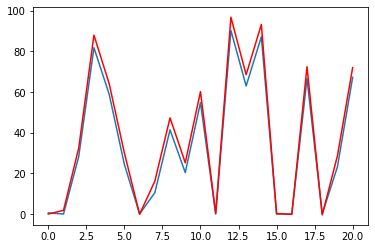

In [25]:
import matplotlib.pyplot as plt
plt.plot(for_plt)
plt.plot(a,'-r')

In [26]:
x=pd.DataFrame(data[0])
x=np.c_[np.ones(x.shape[0]),x]
y=pd.Series(data[1])
y_pred=(x@a)


In [27]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.997885367027014